# **Sistem Rekomendasi pada Movie Recommendation System Dataset**

##### Akan dilakukan pembangunan model sistem rekomendasi dari file csv movies dan ratings pada dataset movie recommendation system dengan url sumber data di https://www.kaggle.com/datasets/parasharmanas/movie-recommendation-system/data.

## **Import Library**

In [1]:
# Import Library yang Dibutuhkan
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

## **Data Understanding**

##### Memahami data yang dimiliki. Pada dataset ini memiliki 2 file terpisah, yaitu film dan rating.

### Memuat Dataset

In [2]:
# Memuat kaggle.json ke Colab
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jocelynnp","key":"1f64a5970521ecb12ed4c86d8205d88f"}'}

In [3]:
# Mengkonfigurasi Dataset
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Mengganti dengan Nama Dataset sesuai URL Kaggle
!kaggle datasets download -d parasharmanas/movie-recommendation-system

# Mengekstraksi File zip
!unzip movie-recommendation-system.zip

Dataset URL: https://www.kaggle.com/datasets/parasharmanas/movie-recommendation-system
License(s): ODbL-1.0
 99% 164M/165M [00:00<00:00, 802MB/s] 
100% 165M/165M [00:00<00:00, 808MB/s]
Archive:  movie-recommendation-system.zip
  inflating: movies.csv              
  inflating: ratings.csv             


In [4]:
# Memuat Dataset Film
movies = pd.read_csv("movies.csv")
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
62418,209157,We (2018),Drama
62419,209159,Window of the Soul (2001),Documentary
62420,209163,Bad Poems (2018),Comedy|Drama
62421,209169,A Girl Thing (2001),(no genres listed)


In [5]:
# Memuat Dataset Rating
ratings = pd.read_csv("ratings.csv")
ratings

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510
...,...,...,...,...
25000090,162541,50872,4.5,1240953372
25000091,162541,55768,2.5,1240951998
25000092,162541,56176,2.0,1240950697
25000093,162541,58559,4.0,1240953434


##### Output dari kode yang telah dijalankan di atas memberikan informasi sebagai berikut:


*   Terdapat dua file pada dataset movie recommendation system, yaitu movies dan ratings.   
*   Pada dataset movies, terdapat 62423 baris jumlah pengamatan dengan 3 kolom berupa 'movieId', 'title', dan 'genres' yang menunjukkan lebih dari 62 ribu jenis film dalam bentuk judul dan kategori.
*   Pada dataset ratings, terdapat 25000095 baris jumlah pengamatan dengan 4 kolom berupa 'userId', 'movieId', 'rating', dan 'timestamp' yang menunjukkan lebih dari 25 juta penonton dalam bentuk ulasan atau rating.



## **Univariate Exploratory Data Analysis**

##### Melakukan proses analisis dan eksplorasi setiap variabel pada data untuk mengetahui karakteristik masing-masing kolom variabel, baik numerik maupun kategorik.

### Deskripsi Variabel

##### Variabel-variabel pada Movie Recommendation System adalah sebagai berikut:

*   movieId: merepresentasikan tanda pengenal unik untuk setiap film.
*   title: merepresentasikan judul film yang sesuai dengan kolom movieId.
*   genres: merepresentasikan kategori film.
*   userId: merepresentasikan tanda pengenal unik penonton.
*   rating: merepresentasikan nilai rating penonton terhadap film dengan skala 0.5 hingga 5.0.
*   timestamp: merepresentasikan waktu ketika penonton memberikan ulasan atau rating.

In [6]:
# Memuat Informasi Dataset Film
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [7]:
# Memuat Informasi Dataset Rating
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000095 entries, 0 to 25000094
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 762.9 MB


In [8]:
# Memuat Deskripsi Statistik Dataset Film
movies.describe()

,movieId
count,62423.000000
mean,122220.387646
std,63264.744844
min,1.000000
25%,82146.500000
50%,138022.000000
75%,173222.000000
max,209171.000000


In [9]:
# Memuat Deskripsi Statistik Dataset Rating
ratings.describe()

,userId,movieId,rating,timestamp
count,2.500010e+07,2.500010e+07,2.500010e+07,2.500010e+07
mean,8.118928e+04,2.138798e+04,3.533854e+00,1.215601e+09
std,4.679172e+04,3.919886e+04,1.060744e+00,2.268758e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,4.051000e+04,1.196000e+03,3.000000e+00,1.011747e+09
50%,8.091400e+04,2.947000e+03,3.500000e+00,1.198868e+09
75%,1.215570e+05,8.623000e+03,4.000000e+00,1.447205e+09
max,1.625410e+05,2.091710e+05,5.000000e+00,1.574328e+09


In [10]:
# Memeriksa Duplikasi Data pada Dataset Film
movies.duplicated().sum()

np.int64(0)

In [11]:
# Memeriksa Duplikasi Data pada Dataset Rating
ratings.duplicated().sum()

np.int64(0)

In [12]:
# Memeriksa Missing Value pada Dataset Film
movies.isnull().sum()

,0
movieId,0
title,0
genres,0


In [13]:
# Memeriksa Missing Value pada Dataset Rating
ratings.isnull().sum()

,0
userId,0
movieId,0
rating,0
timestamp,0


##### Fungsi describe() telah memberikan informasi statistik pada masing-masing kolom, antara lain:


*   count adalah jumlah sampel pada data.
*   mean adalah nilai rata-rata.
*   std adalah standar deviasi.
*   min adalah nilai minimum pada setiap kolom.
*   25% adalah kuartil pertama di mana kuartil merupakan nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
*   50% adalah kuartil kedua atau yang biasa disebut sebagai median (nilai tengah).
*   75% adalah kuartil ketiga.
*   max adalah nilai maksimum pada setiap kolom.

##### Berdasarkan output informasi pada kedua file dataset, dapat terlihat bahwa:


*   Terdapat dua tipe data, yaitu numerikal dan kategorikal di mana variabel numerikal terletak pada kolom 'moviedId', 'userId', 'rating', dan 'timestamp' sedangkan variabel kategorikal terletak pada kolom 'title' dan 'genres'.
*  Pada kolom 'rating' di fungsi describe() dapat terlihat bahwa nilai minimum rating berupa 0.5 sedangkan nilai maksimum rating berupa 5.0 dengan nilai rata-rata sebesar 3.53 atau 3.6 kalau dibulatkan yang berarti penonton cenderung memberikan ulasan atau rating yang cukup tinggi.
* Berdasarkan fungsi duplicated().sum() pada dataset film dan rating, didapatkan bahwa tidak terdapat data duplikat pada dataset tersebut di mana setiap entri data memiliki sifat unik dan tidak mengulangi informasi yang ada.
* Berdasarkan fungsi isnull().sum() serta jumlah entri pada fungsi info() pada dataset film dan rating, didapatkan bahwa tidak terdapat missing values pada kedua dataset tersebut.





### Univariate Analysis

In [14]:
# Memeriksa Berapa Banyak Penonton Berdasarkan 'userId'
print("Banyak user:", ratings["userId"].nunique())

Banyak user: 162541


In [15]:
# Memeriksa Berapa Banyak Entri Unik Film Berdasarkan 'movieId' dan 'title'
print("Banyak film:", movies["movieId"].nunique())
print("Banyak judul film:", movies["title"].nunique())

Banyak film: 62423
Banyak judul film: 62325


In [16]:
# Memeriksa Contoh Judul Film Berdasarkan 'title'
print("Contoh judul film:", movies["title"].unique()[:15])

Contoh judul film: ['Toy Story (1995)' 'Jumanji (1995)' 'Grumpier Old Men (1995)'
 'Waiting to Exhale (1995)' 'Father of the Bride Part II (1995)'
 'Heat (1995)' 'Sabrina (1995)' 'Tom and Huck (1995)'
 'Sudden Death (1995)' 'GoldenEye (1995)' 'American President, The (1995)'
 'Dracula: Dead and Loving It (1995)' 'Balto (1995)' 'Nixon (1995)'
 'Cutthroat Island (1995)']


In [17]:
# Memeriksa Jumlah Masing-Masing Rating Berdasarkan 'rating"
print("Banyak masing-masing rating pada kolom:", ratings["rating"].value_counts().sort_index())

Banyak masing-masing rating pada kolom: rating
0.5     393068
1.0     776815
1.5     399490
2.0    1640868
2.5    1262797
3.0    4896928
3.5    3177318
4.0    6639798
4.5    2200539
5.0    3612474
Name: count, dtype: int64


<ipython-input-18-633125502c2b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="rating", data=ratings, palette="viridis")


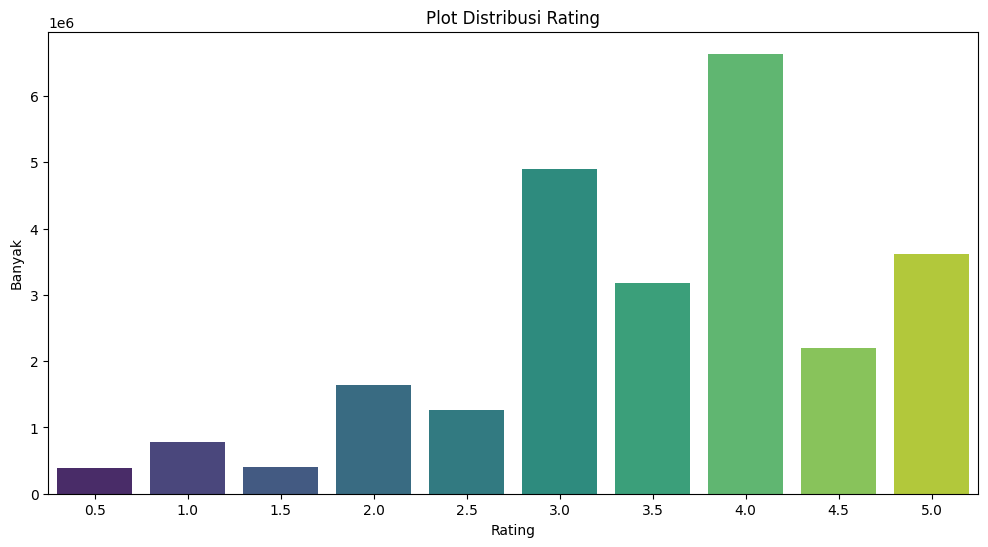

In [18]:
# Visualisasi Distribusi Rating Berdasarkan 'rating'
plt.figure(figsize=(12, 6))
sns.countplot(x="rating", data=ratings, palette="viridis")
plt.title("Plot Distribusi Rating")
plt.xlabel("Rating")
plt.ylabel("Banyak")
plt.show()

In [19]:
# Memeriksa Berapa Banyak Genre Berdasarkan 'genres'
set_genre = set()
for genre in movies["genres"].str.split("|"):
    set_genre.update(genre)
print("Banyak genre:", len(set_genre))

# Memeriksa Genre Apa Saja yang Tertera
print("Daftar Genre:")
for genre in sorted(set_genre):
  print(".", genre)

Banyak genre: 20
Daftar Genre:
. (no genres listed)
. Action
. Adventure
. Animation
. Children
. Comedy
. Crime
. Documentary
. Drama
. Fantasy
. Film-Noir
. Horror
. IMAX
. Musical
. Mystery
. Romance
. Sci-Fi
. Thriller
. War
. Western


##### Berdasarkan output di atas, didapatkan bahwa dataset memiliki 162541 penonton, 62423 film, serta 62325 judul film yang menunjukkan terdapat sedikit variasi penulisan judul film. Berdasarkan jumlah dan distribusi rating, didapatkan bahwa rating memiliki skala antara 0.5 hingga 5.0 dengan interval 0.5 yang berarti memiliki sistem penilaian setengah lalu didapatkan bahwa rating 4.0 mendominasi secara signifikan dengan lebih dari 6 juta ulasan atau rating. Tidak hanya itu, tetapi juga genre yang dimiliki berupa 20 genre termasuk dengan data yang belum lengkap di bagian genre.  

## **Data Preprocessing**

##### Tahap persiapan data selanjutnya adalah dengan melakukan penggabungan beberapa file sehingga dapat menjadi satu kesatuan file yang utuh dan siap digunakan untuk tahap selanjutnya.

### Menggabungkan Dataset

In [20]:
# Menggabungkan Dataset Film dan Rating Berdasarkan 'movieId'
data = pd.merge(ratings, movies, on="movieId")
data

,userId,movieId,rating,timestamp,title,genres
0,1,296,5.0,1147880044,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
1,1,306,3.5,1147868817,Three Colors: Red (Trois couleurs: Rouge) (1994),Drama
2,1,307,5.0,1147868828,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
3,1,665,5.0,1147878820,Underground (1995),Comedy|Drama|War
4,1,899,3.5,1147868510,Singin' in the Rain (1952),Comedy|Musical|Romance
...,...,...,...,...,...,...
25000090,162541,50872,4.5,1240953372,Ratatouille (2007),Animation|Children|Drama
25000091,162541,55768,2.5,1240951998,Bee Movie (2007),Animation|Comedy
25000092,162541,56176,2.0,1240950697,Alvin and the Chipmunks (2007),Children|Comedy
25000093,162541,58559,4.0,1240953434,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX


##### Berdasarkan output di atas, dataset telah digabung menjadi satu kesatuan dan memiliki 25000095 baris jumlah pengamatan dengan 6 kolom variabel.

## **Data Preparation**

##### Mempersiapkan data dan melakukan beberapa teknik seperti menghapus kolom variabel 'timestamp', memeriksa dan menangani missing value, memeriksa dan menangani duplikasi data, melakukan sampling pada dataset, membuat DataFrame baru mengenai 'features_movie',mengubah kategori atau genre film menjadi representasi vektor TF-IDF, serta menghitung tingkat kemiripan dengan cosine similarity.

### Menghapus Kolom Variabel 'timestamp'

##### Kolom variabel 'timestamp' tidak diperlukan untuk pada tahap pemodelan menggunakan content based filtering karena tidak memiliki informasi yang relevan sehingga akan dihapus.

In [21]:
# Menghapus Kolom Variabel 'timestamp'
data.drop(columns=["timestamp"], inplace=True)
data

,userId,movieId,rating,title,genres
0,1,296,5.0,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
1,1,306,3.5,Three Colors: Red (Trois couleurs: Rouge) (1994),Drama
2,1,307,5.0,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
3,1,665,5.0,Underground (1995),Comedy|Drama|War
4,1,899,3.5,Singin' in the Rain (1952),Comedy|Musical|Romance
...,...,...,...,...,...
25000090,162541,50872,4.5,Ratatouille (2007),Animation|Children|Drama
25000091,162541,55768,2.5,Bee Movie (2007),Animation|Comedy
25000092,162541,56176,2.0,Alvin and the Chipmunks (2007),Children|Comedy
25000093,162541,58559,4.0,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX


##### Setelah dilakukan penghapusan kolom variabel 'timestamp', didapatkan data baru hanya memiliki 5 kolom variabel dengan jumlah pengamatan tetap pada 25000095 baris.

### Memeriksa dan Menangani Missing Values

##### Berdasarkan entries pada fungsi info() masing-masing file dataset di atas, didapatkan bahwa tidak terdapat missing values tetapi untuk memastikan akan dilakukan pemeriksaan missing value tetapi menggunakan dataset terbaru yang telah digabung dan telah dihapus untuk kolom variabel 'timestamp'.

In [22]:
# Memeriksa Missing Values pada Dataset Terbaru
data.isnull().sum()

,0
userId,0
movieId,0
rating,0
title,0
genres,0


##### Berdasarkan output di atas, didapatkan bahwa tidak terdapat missing value sehingga tidak perlu dilakukan penanganan missing values.

### Memeriksa dan Menangani Duplikasi Data

##### Berdasarkan pemeriksaan duplikasi pada masing-masing file dataset film dan rating di atas, didapatkan bahwa tidak terdapat duplikasi data tetapi untuk memastikan akan dilakukan pemeriksaan duplikasi data tetapi menggunakan dataset terbaru yang telah digabung dan telah dihapus kolom variabel 'timestamp'.

In [23]:
# Memeriksa Duplikasi Data pada Dataset Terbaru
data.duplicated().sum()

np.int64(0)

##### Berdasarkan output di atas, didapatkan bahwa tidak terdapat duplikasi data sehingga tidak diperlukan penanganan duplikasi data.

### Melakukan Sampling pada Dataset

##### Dataset yang terbaru memiliki ukuran data yang besar sehingga perlu dilakukan pengambilan sampel acak sebanyak 500000 baris dari dataset supaya tahapan selanjutnya dapat berjalan lebih efisien dengan pengaturan random_state untuk memastikan hasil sampling sama setiap dijalankan supaya tetap konsisten.

In [24]:
# Melakukan Sampling Dataset
data_sampling = data.sample(n=500000, random_state=42).copy()
data_sampling

,userId,movieId,rating,title,genres
15347762,99476,104374,3.5,About Time (2013),Drama|Fantasy|Romance
16647840,107979,2634,4.0,"Mummy, The (1959)",Horror
23915192,155372,1614,3.0,In & Out (1997),Comedy
10052313,65225,7153,4.0,"Lord of the Rings: The Return of the King, The...",Action|Adventure|Drama|Fantasy
12214125,79161,500,5.0,Mrs. Doubtfire (1993),Comedy|Drama
...,...,...,...,...,...
23831990,154800,166461,4.0,Moana (2016),Adventure|Animation|Children|Comedy|Fantasy
12471209,80724,56174,3.5,I Am Legend (2007),Action|Horror|Sci-Fi|Thriller|IMAX
10617999,68919,70,3.0,From Dusk Till Dawn (1996),Action|Comedy|Horror|Thriller
10091038,65462,4022,2.0,Cast Away (2000),Drama


##### Berdasarkan output di atas, didapatkan bahwa DataFrame data_sampling berhasil dibuat dengan 500000 baris jumlah pengamatan dengan tetap 5 kolom variabel.

### Membuat DataFrame Baru tentang 'features_movie'

##### Pada tahap pemodelan akan menggunakan content based filtering maka diperlukan membuat DataFrame baru yang memuat kolom variabel 'movieId', 'title', dan 'genres'.

In [25]:
# Membuat DataFrame Baru
features_movie = data_sampling.drop_duplicates("movieId")[["movieId", "title", "genres"]].reset_index(drop=True)
features_movie

,movieId,title,genres
0,104374,About Time (2013),Drama|Fantasy|Romance
1,2634,"Mummy, The (1959)",Horror
2,1614,In & Out (1997),Comedy
3,7153,"Lord of the Rings: The Return of the King, The...",Action|Adventure|Drama|Fantasy
4,500,Mrs. Doubtfire (1993),Comedy|Drama
...,...,...,...
18200,117924,The Bloody Olive (1997),Comedy|Crime|Film-Noir
18201,8257,Battleground (1949),Action|Drama|War
18202,76770,Steal This Film II (2007),Documentary
18203,152569,The Boxcar Children (2014),Adventure|Animation|Children


##### Berdasarkan output di atas, dapat terlihat bahwa DataFrame baru berhasil dibuat dengan memuat 3 kolom variabel berupa 'movieId', 'title', dan 'genres' sebanyak 18205 baris jumlah pengamatan.

### TF-IDF dan Cosine Similarity

##### Pada tahap pemodelan akan menggunakan content based filtering maka diperlukan mengubah kategori atau genre film menjadi representasi fitur penting dengan TF-IDF serta menghitung tingkat kesamaan dengan Cosine Similarity.

In [26]:
# Inisialisasi TfidfVectorizer
tfidf = TfidfVectorizer(token_pattern=r"(?u)\b\w+\b")

# Melakukan Perhitungan idf pada Kolom Variabel 'genres'
tfidf.fit(features_movie["genres"])

# Memuat Nama Fitur pada Kolom Variabel 'genres'
print("Nama fitur (genres):", tfidf.get_feature_names_out())

Nama fitur (genres): ['action' 'adventure' 'animation' 'children' 'comedy' 'crime'
 'documentary' 'drama' 'fantasy' 'fi' 'film' 'genres' 'horror' 'imax'
 'listed' 'musical' 'mystery' 'no' 'noir' 'romance' 'sci' 'thriller' 'war'
 'western']


In [27]:
# Melakukan fit lalu Ditransformasikan ke Bentuk Matriks
tfidf_matrix = tfidf.fit_transform(features_movie["genres"])

# Memuat Ukuran Matriks tfidf
tfidf_matrix.shape

(18205, 24)

In [28]:
# Menghitung Cosine Similarity
cos_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Memeriksa Bentuk Atribut Matriks Cosine Similarity
print("Bentuk Matriks Cosine Similarity:", cos_sim.shape)

Bentuk Matriks Cosine Similarity: (18205, 18205)


##### Berdasarkan output di atas, didapatkan bahwa kategori film berhasil diubah menjadi representasi vektor TF-IDF dengan nama fitur penting yang tertera pada output serta ukuran matriks tfidf (18205, 24) yang berarti terdapat 18205 baris jumlah pengamatan dengan 24 kolom kategori film. Lalu, juga berhasil dihitung tingkat kesamaan atau kemiripan antar film berdasarkan kategori film menggunakan cosine similarity dengan bentuk matriks (18205, 18205) untuk memungkinkan sistem mengenali film yang mirip secara konten pada tahap selanjutnya.

## **Model Development**

##### Mengembangkan sistem rekomendasi dengan teknik content based filtering untuk merekomendasikan film yang mirip atau sama dengan konten antar film lainnya seperti genre.

### Model Sistem Rekomendasi Berdasarkan Kategori atau Genre Film

In [29]:
# Rekomendasi Berdasarkan Kategori Film
def genre_recommendations(input_genres, top_n=10):
  masked_genres = features_movie["genres"].str.contains(input_genres, case=False, na=False)
  movies_matching = features_movie[masked_genres]

  if movies_matching.empty:
    print(f"Tidak terdapat film dengan genre '{input_genres}'")
    return

  tf = movies_matching.index[0]
  cosin_sim = list(enumerate(cos_sim[tf]))
  cosin_sim = [x for x in cosin_sim if x[0] != tf]
  cosin_sim = sorted(cosin_sim, key=lambda x: x[1], reverse=True) [:top_n]

  print(f"Film-film mirip yang direkomendasikan berdasarkan genre '{input_genres}'")
  print(f"Title: {features_movie.iloc[tf]['title']} | Genre: {features_movie.iloc[tf]['genres']}")

  for i, (movies_tf, _) in enumerate(cosin_sim, start=1):
    titles = features_movie.iloc[movies_tf]["title"]
    genres = features_movie.iloc[movies_tf]["genres"]
    print(f"{i}. {titles} | Genre: {genres}")

### Model Sistem Rekomendasi Berdasarkan Judul Film

In [30]:
# Rekomendasi Berdasarkan Judul Film
def title_recommendations(titles, top_n=10):
  matched_titles = features_movie[features_movie["title"].str.lower() == titles.lower()]
  if matched_titles.empty:
    print("Tidak terdapat judul film")
    return

  tf = matched_titles.index[0]
  cosin_sim = list(enumerate(cos_sim[tf]))
  cosin_sim = [x for x in cosin_sim if x[0] != tf]
  cosin_sim = sorted(cosin_sim, key=lambda x: x[1], reverse=True) [:top_n]

  print(f"Film yang direkomendasikan berdasarkan: {features_movie.iloc[tf]['title']} | Genre: {features_movie.iloc[tf]['genres']}")

  for i, (movies_tf, _) in enumerate(cosin_sim, start=1):
    titles_reccomend = features_movie.iloc[movies_tf]["title"]
    genres_reccomend = features_movie.iloc[movies_tf]["genres"]
    print(f"{i}. {titles_reccomend} | Genre: {genres_reccomend}")

## **Evaluasi Model**

##### Metrik yang akan digunakan pada sistem rekomendasi film ini adalah presisi sistem rekomendasi yang menghitung jumlah rekomendasi item yang relevan dibagi dengan jumlah total item yang direkomendasikan.


### Evaluasi Model Sistem Rekomendasi Berdasarkan Kategori atau Genre Film

In [31]:
# Evaluasi Sistem Rekomendasi Kategori Film
genre_recommendations("Thriller")

Film-film mirip yang direkomendasikan berdasarkan genre 'Thriller'
Title: Children of the Corn (1984) | Genre: Horror|Thriller
1. Venom (2005) | Genre: Horror|Thriller
2. Birds, The (1963) | Genre: Horror|Thriller
3. Gerald's Game (2017) | Genre: Horror|Thriller
4. Hannibal (2001) | Genre: Horror|Thriller
5. Body Parts (1991) | Genre: Horror|Thriller
6. Final Destination, The (Final Destination 4) (Final Destination in 3-D, The) (2009) | Genre: Horror|Thriller
7. Final Destination 2 (2003) | Genre: Horror|Thriller
8. Poltergeist (1982) | Genre: Horror|Thriller
9. Lake Placid (1999) | Genre: Horror|Thriller
10. Haunting in Connecticut, The (2009) | Genre: Horror|Thriller


### Evaluasi Model Sistem Rekomendasi Berdasarkan Judul Film

In [32]:
# Evaluasi Sistem Rekomendasi Judul Film
title_recommendations("Steal This Film II (2007)")

Film yang direkomendasikan berdasarkan: Steal This Film II (2007) | Genre: Documentary
1. Crumb (1994) | Genre: Documentary
2. Bowling for Columbine (2002) | Genre: Documentary
3. Kid Stays in the Picture, The (2002) | Genre: Documentary
4. Fahrenheit 9/11 (2004) | Genre: Documentary
5. 12th & Delaware (2010) | Genre: Documentary
6. Jiro Dreams of Sushi (2011) | Genre: Documentary
7. Bigger, Stronger, Faster* (2008) | Genre: Documentary
8. Capturing the Friedmans (2003) | Genre: Documentary
9. Project Nim (2011) | Genre: Documentary
10. Stevie (2002) | Genre: Documentary


##### Berdasarkan output di atas, didapatkan bahwa model content based learning berhasil merekomendasikan 100% judul film dengan kategori film yang konsisten seperti Horror|Thriller dan Documentary yang tertera di atas yang berarti menunjukkan bahwa model telah bekerja dengan efektif dalam mengenali kemiripan kategori atau genre film beserta judul film.